## Model Evaluation

In [17]:
import pandas as pd
import bertopic
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import word_tokenize
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mradi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [18]:
model_path = "../bertopic_model.pkl"
with open(model_path, 'rb') as file:
    topic_model = pickle.load(file)

df = pd.read_csv("../../data/topic_modeling_results.csv")

topics = df["topics"].unique()
topics = [topic for topic in topics if topic != -1] # Menghilangkan topik -1 (noise)

# Mendapatkan kata-kata utama dari setiap topik
topic_words = {topic: topic_model.get_topic(topic) for topic in topics}
topic_word_list = [[word for word, _ in topic_words[topic]] for topic in topic_words]

In [19]:
df.head()

,Judul,Penulis,Tahun,topics,probabilities
0,mixed reality system pepper ghost system kenda...,"Aristyo Pramana, Eriq Muh. Adams Jonemaro, Wib...",31 Jan 2017,37,0.086971
1,penjadwalan mata pelajaran metode tabu searchs...,"Olive Khoirul L.M.A., Agus Wahyu Widodo, Budi ...",31 Jan 2017,-1,0.000000
2,push notification websocket,"Andrias Yudianto, Eko Sakti Pramukantoro, Kasy...",31 Jan 2017,-1,0.000000
3,sistem informasi manajemen keluhan pelanggan b...,"Adzanil Rachmadi P, Fatwa Ramdani, Retno Indah...",31 Jan 2017,-1,0.000000
4,metode store and forward hypertext transfer pr...,"Muhammad Gigih Wicaksono, Aswin Suharsono, Adh...",31 Jan 2017,108,1.000000


In [45]:
df.shape

(6266, 5)

In [20]:
num_outliers = (df["topics"] == -1).sum()
print(f"Jumlah judul dengan topic -1: {num_outliers}")

Jumlah judul dengan topic -1: 2086


In [21]:
topic_model.get_topic(-1)

[('aplikasi', 0.007849537890866804),
 ('sistem', 0.007467845219760495),
 ('berbasis', 0.007399130766251868),
 ('design', 0.007167983797737805),
 ('studi', 0.00710838955802682),
 ('web', 0.006464897860382588),
 ('metode', 0.006193456262020895),
 ('informasi', 0.0060039934211818784),
 ('manajemen', 0.005975446078357473),
 ('user', 0.005814103686826018)]

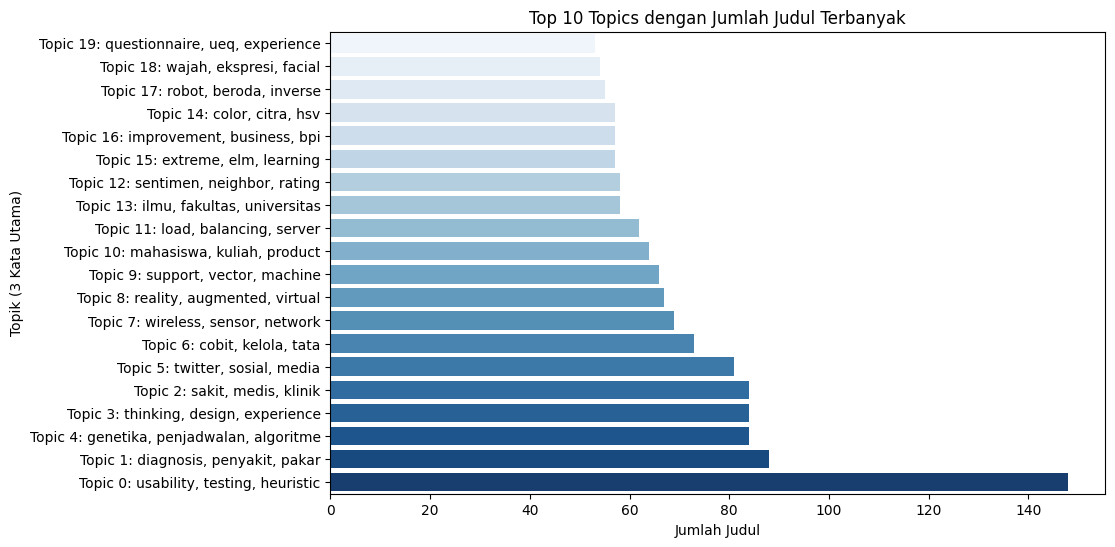

In [22]:
# Hitung jumlah judul per topik
df2 = df[df["topics"] != -1]
topic_counts = df2["topics"].value_counts().reset_index()
topic_counts.columns = ["Topic", "Count"]

# Ambil top 10 topik dengan jumlah judul terbanyak
top_10_topics = topic_counts.nlargest(20, "Count")

# Ambil 3 kata utama per topik untuk label
top_10_topics["Label"] = [
    f"Topic {topic_id}: " + ", ".join([word for word, _ in topic_model.get_topic(topic_id)][:3])  # ID + 3 kata utama
    for topic_id in top_10_topics["Topic"]
]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_topics, x="Count", y="Label", palette="Blues_r")
plt.xlabel("Jumlah Judul")
plt.ylabel("Topik (3 Kata Utama)")
plt.title("Top 10 Topics dengan Jumlah Judul Terbanyak")
plt.gca().invert_yaxis()
plt.show()

In [39]:
topics = topic_model.get_topics()

top_n = 10
topic_words = []
for topic_id in topics:
    words = [word for word, _ in topics[topic_id][:top_n]]
    topic_words.append(words)

In [40]:
df3 = pd.read_csv("../../data/cleaned_data.csv")
docs = df["Judul"].astype(str).tolist()

In [41]:
# Tokenisasi dokumen
tokenized_docs = [word_tokenize(doc.lower()) for doc in docs]

# Bikin dictionary dan corpus
dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

In [42]:
coherence_model = CoherenceModel(
    topics=topic_words,
    texts=tokenized_docs,
    dictionary=dictionary,
    coherence='c_v'
)

coherence_score = coherence_model.get_coherence()
print("Coherence Score:", coherence_score)


Coherence Score: 0.5909659060591967


In [43]:
coherence_scores = coherence_model.get_coherence_per_topic()

for i, (words, score) in enumerate(zip(topic_words, coherence_scores)):
    print(f"Topik {i} - Coherence: {score:.4f}")
    print("Kata-kata topik:", ", ".join(words))
    print("-" * 50)


Topik 0 - Coherence: 0.5122
Kata-kata topik: aplikasi, sistem, berbasis, design, studi, web, metode, informasi, manajemen, user
--------------------------------------------------
Topik 1 - Coherence: 0.7046
Kata-kata topik: usability, testing, heuristic, evaluation, scale, pengujian, sus, perbaikan, aplikasi, mobile
--------------------------------------------------
Topik 2 - Coherence: 0.6624
Kata-kata topik: diagnosis, penyakit, pakar, factor, tanaman, dempstershafer, neighbor, knearest, certainty, modified
--------------------------------------------------
Topik 3 - Coherence: 0.5650
Kata-kata topik: sakit, medis, klinik, rekam, kesehatan, pasien, rumah, gigi, dokter, puskesmas
--------------------------------------------------
Topik 4 - Coherence: 0.8073
Kata-kata topik: thinking, design, experience, user, mobile, pengalaman, aplikasi, pengguna, online, metode
--------------------------------------------------
Topik 5 - Coherence: 0.3497
Kata-kata topik: genetika, penjadwalan, algo